# Project Title: Insta Bot 2 - Collecting the data from instagram to grow the page in a specific field

## Introduction
Insta Bot 2 is a Python-based automation tool designed to perform various tasks on Instagram seamlessly. Leveraging Selenium WebDriver, this bot can interact with different Instagram elements, automate user actions, and analyze engagement data. The project aims to simplify and expedite routine Instagram activities such as liking posts, following/unfollowing users, and interacting with stories and collecting the data regarding to how a page grow in the instagram

## Methodology
### Setup and Configuration:
Initial setup of Selenium WebDriver and necessary libraries for web automation.
### Element Identification:
Use of XPath, class names, and other selectors to accurately locate and interact with Instagram elements.
### Automation Scripts:
Writing Python scripts to automate specific tasks such as viewing stories and liking posts.
### Data Collection and Analysis:
Collection of interaction data and performing statistical analysis to find correlations between different metrics like 'mpg' and 'horsepower'.
### Testing and Debugging:
Rigorous testing of the bot to ensure functionality and efficiency in handling errors.

## Importing All the neccessory liberaries

In [78]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.select import Select
from bs4 import BeautifulSoup
import pandas as pd
import pickle
import time

In [79]:
driver=webdriver.Edge()
driver.get('https://www.instagram.com/')

### logging in instagram using presaved cookie

In [80]:
with open('insta_cookies.pkl', 'rb') as f:
    cookies=pickle.load(f)

In [81]:
for cookie in cookies:
    driver.add_cookie(cookie)
driver.refresh()


In [82]:
notify=driver.find_element('class name', '_a9--')
notify.click()
#driver.find_element('class name', 'x6s0dn4').find_element('tag name', 'input').send_keys('food')\


# Part 1

## From the Top 10 handels which comes first by ssearching food, talking top 5 handles from them on the basis of followers

In [84]:
search_input =    driver.find_element('xpath',"//input[@placeholder='Search']")
search_input.clear()
search_input.send_keys("food")

In [85]:
handles = driver.find_element(By.XPATH, '//*[@class="x9f619 x78zum5 xdt5ytf x1iyjqo2 x6ikm8r x1odjw0f xocp1fn"]')
a_tags=handles.find_elements('tag name', 'a')
handle_links = []
for i in range(0,21,2):
    link=str(a_tags[i].get_attribute('href'))
    link=link.split('/')
    if len(link)==5:
        handle_links.append('/'.join(link))

In [86]:
handle_links

['https://www.instagram.com/foodie_in_car/',
 'https://www.instagram.com/foodpandits/',
 'https://www.instagram.com/food_lovers6103/',
 'https://www.instagram.com/thefoodiemom6996/',
 'https://www.instagram.com/street_food_finder_82/',
 'https://www.instagram.com/thatlucknowfoodie/',
 'https://www.instagram.com/food/',
 'https://www.instagram.com/official_food_city/',
 'https://www.instagram.com/taimsfood/',
 'https://www.instagram.com/whatthefood09/']

In [87]:
n_f={}
for link in handle_links:
    driver.get(link)
    time.sleep(3)
    e=driver.find_elements('css selector',".x5n08af.x1s688f.x1lliihq")
    f=e[1].get_attribute('title')
    n_f[link]=f

In [11]:
n_f

{'https://www.instagram.com/foodie_in_car/': '462,708',
 'https://www.instagram.com/food_lovers6103/': '18,004',
 'https://www.instagram.com/foodpandits/': '526,624',
 'https://www.instagram.com/thefoodiemom6996/': '8,297',
 'https://www.instagram.com/street_food_finder_82/': '810,408',
 'https://www.instagram.com/thatlucknowfoodie/': '68,702',
 'https://www.instagram.com/food/': '183,555',
 'https://www.instagram.com/whatthefood09/': '84',
 'https://www.instagram.com/official_food_city/': '112,520',
 'https://www.instagram.com/taimsfood/': '63,537'}

In [89]:
for k,v in n_f.items():
    n_f[k]=int(v.replace(',', ''))

## Sorting the dictionary to get the top 5 handels from Above

In [90]:
sorted_dict = dict(sorted(n_f.items(), key=lambda item: item[1], reverse=True))

## Take the number of post which satisfying our req_dates list which contain previous three dates

In [94]:
req_dates=['2024-09-02','2024-09-01', '2024-08-31']
i=0
counts=[]
for k,v in sorted_dict.items():
    count=0
    driver.get(k)
    time.sleep(4)
    driver.find_element('class name', '_aagw').click()
    for _ in range(20):
        datetime=driver.find_element('xpath','//time[@class="x1p4m5qa"]').get_attribute('datetime')
        date=datetime.split('T')[0]
        if date in req_dates:
            count+=1
        div=WebDriverWait(driver,10).until(EC.presence_of_element_located(('css selector',"._aaqg._aaqh")))
        div.find_element('tag name', 'button').click()
    counts.append(count)
    i+=1
    if i==5:
        break

## Taking the username of the top handels by Parcing the link

In [72]:
i=0
username=[]
top_handles=[]
for k,v in sorted_dict.items():
    top_handles.append(k)
    v=k.split('/')[3]
    username.append(v)
    
    i+=1
    username
    if i==5:
        break

## Plotting the bar chart which showing the post counts by per user

Text(0, 0.5, 'Counts')

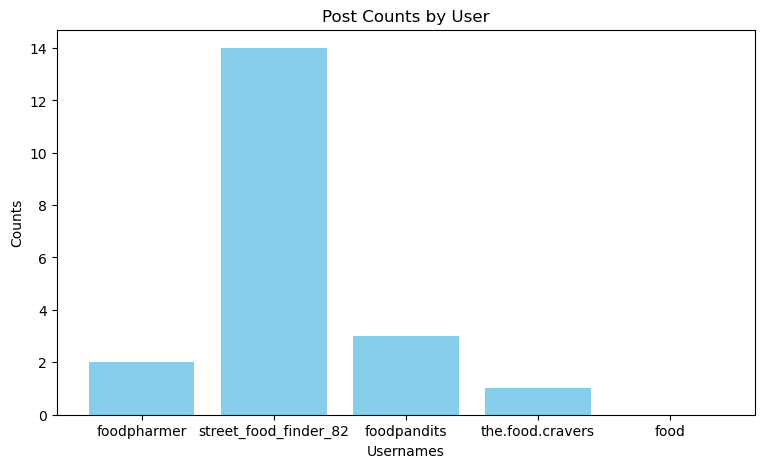

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
plt.bar(username, counts, color='skyblue')

# Add title and labels
plt.title('Post Counts by User')
plt.xlabel('Usernames')
plt.ylabel('Counts')

# Part-2


 ## Screapping all the tags from the top 10 post of the top 5 handels

In [98]:
hashtags=[]
for handle in top_handles:
    driver.get(handle)
    time.sleep(3)
    driver.find_element('class name', '_aagw').click()
    for _ in range(10):
        hash=driver.find_element('class name', '_a9zs').find_elements('tag name','a')
        for h in hash:
            hashtags.append(h.text)
        div=WebDriverWait(driver,10).until(EC.presence_of_element_located(('css selector',"._aaqg._aaqh")))
        div.find_element('tag name', 'button').click()
    


In [93]:
hash=driver.find_element('class name', '_a9zs').find_elements('tag name','a')

### Taking only the Hashtags

In [115]:
only_hash=[]
for h in hashtags:
    if h[0]=='#':
        only_hash.append(h[1:])

## Taking Frequecy of HashTags and saving them from the dictionary with the respecting tags

In [116]:
hash_dict={}
for h in only_hash:
    if h in hash_dict:
        hash_dict[h]+=1
    else:
        hash_dict[h]=1

In [117]:
sorted_dict_desc = dict(sorted(hash_dict.items(), key=lambda item: item[1], reverse=True))

In [118]:
sorted_dict_desc

{'streetfood': 16,
 'instagram': 11,
 'reels': 11,
 'viral': 11,
 'foodreels': 10,
 'foodpandits': 9,
 'tasty': 8,
 'foodblogger': 8,
 'foryoupage': 7,
 'foods': 7,
 'foodgasm': 7,
 'foodporn': 7,
 'foodpic': 7,
 'reelsindia': 6,
 'foodart': 6,
 'reelsviral': 5,
 'trending': 5,
 'instafood': 5,
 'foodies': 5,
 'foodaholic': 5,
 'réel': 5,
 'support': 5,
 'foodaddict': 5,
 'breakfast': 5,
 'snacks': 5,
 'soulfood': 5,
 'easyrecipes': 5,
 'reelsfb': 4,
 'foodi': 4,
 'fbpro': 4,
 'instagood': 4,
 'foodstagram': 4,
 'reelitfeelit': 4,
 'morning': 4,
 'reelsinstagram': 4,
 'healthyrecipes': 4,
 'food': 3,
 'insta': 3,
 'momo': 3,
 'rajmachawal': 3,
 'foodstyling': 3,
 'healthy': 3,
 'dallake': 3,
 'jammukashmir': 3,
 'LabelPadhegaIndia': 2,
 'trend': 2,
 'viralfood': 2,
 'testy': 2,
 'daily': 2,
 'streetfoodindia': 2,
 'indianblogger': 2,
 'jammublogger': 2,
 'delicious': 2,
 'jammufood': 2,
 'indianfood': 2,
 'punjab': 2,
 'foodlovers': 2,
 'instadaily': 2,
 'indianstreetfood': 2,
 'trends

## Saving the hashtags in the csv file with the name and there Frequency

In [121]:
import csv

csv_file = 'word_frequencies.csv'

# Write the dictionary to a CSV file
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Word', 'Frequency'])
    for word, freq in sorted_dict_desc.items():
        writer.writerow([word, freq])

## top 5 most populer hashtags

In [126]:
i=0
top_hashes=[]
freqs=[]
for word, freq in sorted_dict_desc.items():
    freqs.append(freq)
    print(word)
    top_hashes.append(word)
    i+=1
    if i==5:
        break

streetfood
instagram
reels
viral
foodreels


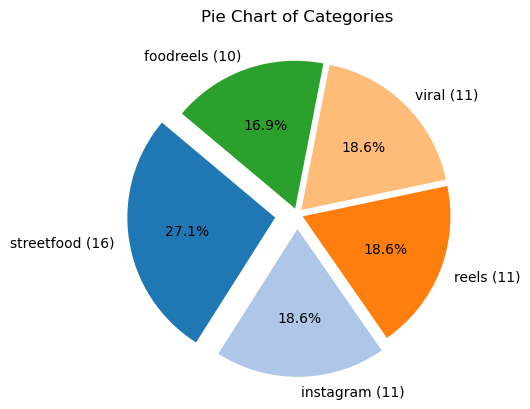

In [136]:

explode = [0.15, 0.1, 0.04, 0.04, 0.04]
total = sum(freqs)
labels_with_freq_and_perc = [f'{label} ({freq})' for label, freq in zip(top_hashes, freqs)]
plt.pie(freqs, labels=labels_with_freq_and_perc, autopct='%1.1f%%', startangle=140, colors=plt.get_cmap('tab20').colors, explode=explode)

# Adding a title
plt.title('Pie Chart of Categories')

# Display the plot
plt.show()

# Part - 3

## The Average number Followers of top handels

In [17]:
sorted_dict

{'https://www.instagram.com/street_food_finder_82/': 810408,
 'https://www.instagram.com/foodpandits/': 526624,
 'https://www.instagram.com/foodie_in_car/': 462708,
 'https://www.instagram.com/food/': 183555,
 'https://www.instagram.com/official_food_city/': 112520,
 'https://www.instagram.com/thatlucknowfoodie/': 68702,
 'https://www.instagram.com/taimsfood/': 63537,
 'https://www.instagram.com/food_lovers6103/': 18004,
 'https://www.instagram.com/thefoodiemom6996/': 8297,
 'https://www.instagram.com/whatthefood09/': 84}

In [21]:
sum_10=0
for k,v in sorted_dict.items():
    sum_10+=v

In [22]:
average_follower_of_top= sum_10/10

In [23]:
average_follower_of_top

225443.9

## Finding the likes of top 10 post of the top 5 handels

In [26]:
elements = driver.find_elements('css selector',"span.html-span.xdj266r.x11i5rnm.xat24cr.x1mh8g0r.xexx8yu.x4uap5.x18d9i69.xkhd6sd.x1hl2dhg.x16tdsg8.x1vvkbs")

In [48]:
likes={}
i=0
for k,v in sorted_dict.items():
    driver.get(k)
    time.sleep(3)
    driver.find_element('class name', '_aagw').click()
    i+=1
    for _ in range(10):
        try:
            like=driver.find_elements('css selector',"span.html-span.xdj266r.x11i5rnm.xat24cr.x1mh8g0r.xexx8yu.x4uap5.x18d9i69.xkhd6sd.x1hl2dhg.x16tdsg8.x1vvkbs")[3]
            if k in likes:
                likes[k]+=int(like.text.replace(',', ''))
            else:
                likes[k]=int(like.text.replace(',', ''))
        except:
        
            continue
        div=WebDriverWait(driver,10).until(EC.presence_of_element_located(('css selector',"._aaqg._aaqh")))
        div.find_element('tag name', 'button').click()
    if i==5:
        break
    

In [36]:
like=driver.find_elements('css selector',"span.html-span.xdj266r.x11i5rnm.xat24cr.x1mh8g0r.xexx8yu.x4uap5.x18d9i69.xkhd6sd.x1hl2dhg.x16tdsg8.x1vvkbs")[3]

## There are only 4 becuase one of the handels has there likes provate

In [46]:
likes

{'https://www.instagram.com/street_food_finder_82/': 16385,
 'https://www.instagram.com/foodpandits/': 1437431,
 'https://www.instagram.com/foodie_in_car/': 180086,
 'https://www.instagram.com/official_food_city/': 3424}

In [51]:
avg_likes={}s
for k, v in likes.items():
    avg_likes[k]=v/10

# Average number of likes in the top handels

In [52]:
avg_likes

{'https://www.instagram.com/street_food_finder_82/': 1643.7,
 'https://www.instagram.com/foodpandits/': 143749.9,
 'https://www.instagram.com/foodie_in_car/': 18010.1,
 'https://www.instagram.com/official_food_city/': 342.7}

## taking the ratio of the top handels of there followers and likes

In [73]:
follower_like_ratio={}
user=[]
ratio=[]
for k,v in avg_likes.items():
    if k in sorted_dict:
        follower_like_ratio[k]=sorted_dict[k]/v
        ratio.append(sorted_dict[k]/v)
        user.append(k.split('/')[3])
    

In [70]:
follower_like_ratio

{'https://www.instagram.com/street_food_finder_82/': 493.03887570724584,
 'https://www.instagram.com/foodpandits/': 3.663473852851376,
 'https://www.instagram.com/foodie_in_car/': 25.691584166662043,
 'https://www.instagram.com/official_food_city/': 328.33381966734754}

## The relevant Graph showing the Follower like Ratio of top handels

Text(0, 0.5, 'Ratio')

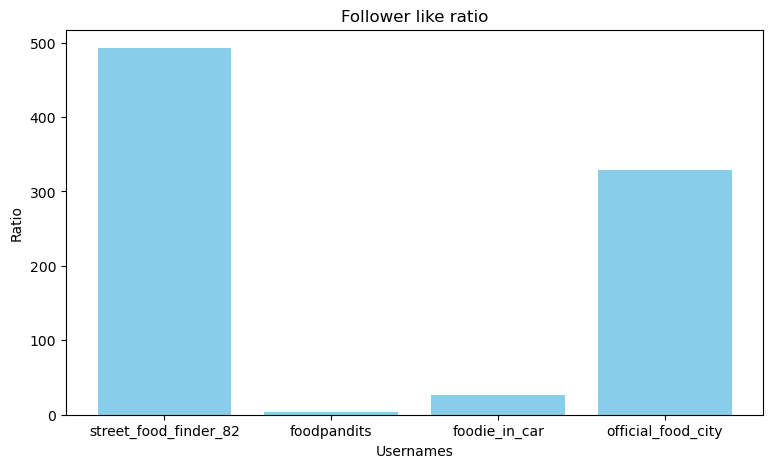

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
plt.bar(user, ratio, color='skyblue')

# Add title and labels
plt.title('Follower like ratio')
plt.xlabel('Usernames')
plt.ylabel('Ratio')